In [12]:
#Importa funções
from funcoesTermosol import *
from jacobi_gauss import *

In [13]:
def matprint(mat, fmt="g"):        # Credits to braingineer https://gist.github.com/braingineer/d801735dac07ff3ac4d746e1f218ab75
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

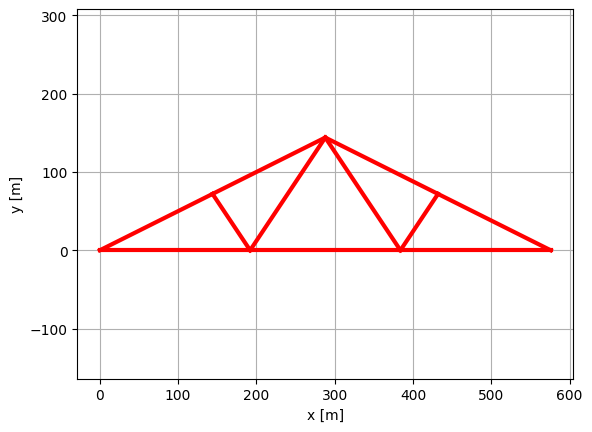

In [14]:
#Lê arquivo de entrada
nn,N,nm,Inc,nc,F,nr,R = importa('entrada2.xls')
plota(N,Inc)

In [15]:
#Cria os nos e elementos
nos = cria_nos(nn,N,F)
elementos = cria_elementos(nm,Inc,nos)

In [16]:
#Calcula as Matrizes de Rigidez
for elemento in elementos:
    matriz_rigidez = calcula_matriz_rigidez(elemento)
    elemento.setMatrizRigidez(matriz_rigidez)

In [17]:
#Calcula a matriz de rigidez universal
K_G = get_matriz_universal(nn,nm,elementos)
temp = K_G

In [18]:
#Inverte o array de R
R_invertido = np.zeros_like(R)
cont = len(R)-1
i = 0
while cont>=0:
    R_invertido[i] = R[cont]
    cont -=1
    i+=1

R_invertido

array([[13.],
       [ 1.],
       [ 0.]])

In [19]:
F_alterado = F
mask_K_G = np.ones(K_G.shape[0],bool)
mask_F = np.ones(K_G.shape[0],bool)
for restricao in R_invertido:
    mask_K_G[int(restricao[0])] = 0
    mask_F[int(restricao[0])] = 0

K_G_alterado = K_G[mask_K_G,:][:,mask_K_G]
F_alterado = F[mask_F,:]


In [20]:
U = np.linalg.inv(K_G_alterado)@F_alterado
U2 = np.zeros_like(F)
cont = 0
for i in range(0,len(F)):
    if i not in R:
        U2[i] = U[cont]
        cont+=1

Reac = np.dot(temp,U2)
Reacoes_final = np.zeros_like(R)
cont = 0
for i in range(0,len(F)):
    if i in R:
        Reacoes_final[cont] = Reac[i]
        cont+=1

deformacoes,tensoes,forcas = get_lista_deformacoes_forcas_tensoes(U2,elementos)

geraSaida("Numpy",Reacoes_final,U2,deformacoes,forcas,tensoes)

In [21]:
U = jacobi(K_G_alterado,F_alterado,10000,1e-20)
U2 = np.zeros_like(F)
cont = 0
for i in range(0,len(F)):
    if i not in R:
        U2[i] = U[cont]
        cont+=1

Reac = np.dot(temp,U2)
Reacoes_final = np.zeros_like(R)
cont = 0
for i in range(0,len(F)):
    if i in R:
        Reacoes_final[cont] = Reac[i]
        cont+=1

deformacoes,tensoes,forcas = get_lista_deformacoes_forcas_tensoes(U2,elementos)

geraSaida("Jacobi",Reacoes_final,U2,deformacoes,forcas,tensoes)

3.2485758756881964e+107


/home/perubr12/Desktop/Insper/Transcal/APS4_Transacal/jacobi_gauss.py:13: RuntimeWarning: invalid value encountered in divide
  erro = np.divide(np.subtract(x,x_antigo),x + 1e-15)
/home/perubr12/Desktop/Insper/Transcal/APS4_Transacal/jacobi_gauss.py:12: RuntimeWarning: invalid value encountered in add
  x[i] = ((b[i]-np.dot(linha,x_antigo))/linha[i]) + x[i]


In [22]:
U = seidel(K_G_alterado,F_alterado,10000,1e-20)
U2 = np.zeros_like(F)
cont = 0
for i in range(0,len(F)):
    if i not in R:
        U2[i] = U[cont]
        cont+=1

Reac = np.dot(temp,U2)
Reacoes_final = np.zeros_like(R)
cont = 0
for i in range(0,len(F)):
    if i in R:
        Reacoes_final[cont] = Reac[i]
        cont+=1

deformacoes,tensoes,forcas = get_lista_deformacoes_forcas_tensoes(U2,elementos)

geraSaida("Seidel",Reacoes_final,U2,deformacoes,forcas,tensoes)